In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import faiss
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
target = pd.read_csv('..//train.csv', index_col=0)
target 

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,Target
Id,,,,,,,,,,,,,,,,,,,,,
0-query,-53.882748,17.971436,-42.117104,-183.936680,187.517490,-87.144930,-347.360606,38.307602,109.085560,30.413513,...,70.107360,-155.802570,-101.965943,65.903790,34.457500,62.642094,134.763600,-415.750254,-25.958572,675816-base
1-query,-87.776370,6.806268,-32.054546,-177.260390,120.803330,-83.810590,-94.572749,-78.433090,124.915900,140.331070,...,4.669178,-151.697710,-1.638704,68.170876,25.096191,89.974976,130.589630,-1035.092211,-51.276833,366656-base
2-query,-49.979565,3.841486,-116.118590,-180.401980,190.128430,-50.837620,26.943937,-30.447489,125.771164,211.607820,...,78.039764,-169.146200,82.144186,66.008220,18.400496,212.409730,121.931470,-1074.464888,-22.547178,1447819-base
3-query,-47.810562,9.086598,-115.401695,-121.011360,94.652840,-109.255410,-775.150134,79.186520,124.003100,242.650650,...,44.515266,-145.416750,93.990981,64.131350,106.061920,83.178760,118.277725,-1074.464888,-19.902788,1472602-base
4-query,-79.632126,14.442886,-58.903397,-147.052540,57.127068,-16.239529,-321.317964,45.984676,125.941284,103.392670,...,45.028910,-196.092070,-117.626337,66.926220,42.456170,77.621765,92.479930,-1074.464888,-21.149351,717819-base
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995-query,-68.180530,11.657515,-63.179720,-188.726530,131.113100,-65.125340,-514.276885,95.990750,118.761185,-5.635696,...,38.573555,-133.087130,14.040794,66.477340,-36.148730,61.689774,107.037950,-1074.464888,-35.128250,811868-base
99996-query,-66.540890,2.201112,-70.292114,-146.167850,77.817140,-47.525654,-118.994688,-25.183374,131.499820,183.260880,...,33.324960,-110.576416,-84.448525,65.818100,-30.268772,133.784000,154.495860,-1144.590904,-108.663510,1460772-base
99997-query,-53.948240,4.726887,-29.278950,-147.182830,264.090670,-101.135630,-427.544045,68.057560,118.084310,192.449250,...,-14.146965,-184.663830,22.971385,67.347800,110.437100,35.785603,111.616710,-714.897734,-4.270569,2366140-base


In [3]:
base = pd.read_csv('..//base.csv', index_col=0)
base

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
Id,,,,,,,,,,,,,,,,,,,,,
0-base,-115.083890,11.152912,-64.426760,-118.88089,216.482440,-104.698060,-469.070588,44.348083,120.915344,181.449700,...,-42.808693,38.800827,-151.76218,-74.389090,63.666340,-4.703861,92.933610,115.269190,-112.756640,-60.830353
1-base,-34.562202,13.332763,-69.787610,-166.53348,57.680607,-86.098370,-85.076666,-35.637436,119.718636,195.234190,...,-117.767525,41.100000,-157.82940,-94.446806,68.202110,24.346846,179.937930,116.834000,-84.888941,-59.524610
2-base,-54.233746,6.379371,-29.210136,-133.41383,150.895830,-99.435326,52.554795,62.381706,128.951450,164.381470,...,-76.397800,46.011803,-207.14442,127.325570,65.566180,66.325680,81.073490,116.594154,-1074.464888,-32.527206
3-base,-87.520130,4.037884,-87.803030,-185.06763,76.369540,-58.985165,-383.182845,-33.611237,122.031910,136.233580,...,-70.647940,-6.358921,-147.20105,-37.692750,66.202890,-20.566910,137.206940,117.474100,-1074.464888,-72.915490
4-base,-72.743850,6.522049,43.671265,-140.60803,5.820023,-112.074080,-397.711282,45.182500,122.167180,112.119064,...,-57.199104,56.642403,-159.35184,85.944724,66.766320,-2.505783,65.315285,135.051590,-1074.464888,0.319401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4744755-base,-125.086300,4.735448,38.284935,-125.27671,209.788360,-47.870010,-628.127378,-71.077340,125.534355,29.341850,...,-70.364395,55.428260,-191.53702,122.978279,65.515260,108.963715,-52.795380,117.254510,-615.998268,-77.768555
4744759-base,-108.598390,5.454173,-22.191975,-158.71666,113.606110,-88.843430,-117.234538,137.317690,129.056690,164.754240,...,-70.360190,18.439003,-90.65145,-28.586794,68.691666,1.636499,-24.388298,93.530540,-1074.464888,-90.800400
4744762-base,-97.026730,-2.143885,-71.274090,-144.68066,149.464810,-21.572212,-759.626065,-108.151955,124.810135,118.760700,...,-55.961933,62.923470,-169.11832,108.452806,68.592970,43.205433,69.029830,129.536650,-1074.464888,4.718300


In [4]:
valid = pd.read_csv('..//validation.csv', index_col=0)
valid

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
Id,,,,,,,,,,,,,,,,,,,,,
100000-query,-57.372734,3.597752,-13.213642,-125.926790,110.745940,-81.279594,-461.003172,139.815720,112.880980,75.215750,...,-75.513020,52.830902,-143.43945,59.051935,69.28224,61.927513,111.592530,115.140656,-1099.130485,-117.079360
100001-query,-53.758705,12.790300,-43.268543,-134.417620,114.449910,-90.520130,-759.626065,63.995087,127.117905,53.128998,...,-79.441830,29.185436,-168.60590,-82.872443,70.76560,-65.975950,97.077160,123.391640,-744.442332,-25.009320
100002-query,-64.175095,-3.980927,-7.679249,-170.160930,96.446160,-62.377740,-759.626065,87.477554,131.270110,168.920320,...,-134.795410,37.368730,-159.66231,-119.232725,67.71044,86.002060,137.636410,141.081630,-294.052271,-70.969604
100003-query,-99.286860,16.123936,9.837166,-148.060440,83.697080,-133.729720,58.576403,-19.046660,115.042404,75.206730,...,-77.236110,44.100494,-132.53012,-106.318982,70.88396,23.577892,133.183960,143.252940,-799.363667,-89.392670
100004-query,-79.532920,-0.364173,-16.027431,-170.884950,165.453920,-28.291668,33.931936,34.411217,128.903980,102.086914,...,-123.770250,45.635944,-134.25893,13.735359,70.61763,15.332115,154.568120,101.700640,-1171.892332,-125.307890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995-query,-46.672780,6.644193,7.376480,-116.126400,80.031715,-48.248695,-17.696937,108.150240,122.729744,103.643906,...,-65.641110,62.823895,-148.86781,-66.402868,66.99333,76.524155,66.525670,112.273720,-177.375834,-82.804726
199996-query,-94.786316,10.852646,13.700245,-125.619385,21.545967,-89.625534,79.880236,-46.513206,123.578730,74.033020,...,-65.032900,38.019740,-113.62750,-18.436499,64.16223,-117.032380,94.026490,86.279526,-1271.502930,-63.491104
199997-query,-59.224453,13.585838,22.655106,-134.926030,145.205690,-63.278100,-109.805058,16.277431,128.150040,168.835420,...,-48.826626,39.679783,-149.33646,160.609919,71.55922,25.237282,-35.985450,97.924790,73.080770,-28.081186


In [5]:
valid_answer = pd.read_csv('..//validation_answer.csv', index_col=0)
valid_answer

,Expected
Id,
100000-query,2676668-base
100001-query,91606-base
100002-query,472256-base
100003-query,3168654-base
100004-query,75484-base
...,...
199995-query,967418-base
199996-query,1344948-base
199997-query,1690782-base


In [6]:
targets = target["Target"]
target = target.drop("Target", axis=1)

Сравним информацию о данных тренировочного и валидационного датасетов

In [7]:
target.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0-query to 99999-query
Data columns (total 72 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       100000 non-null  float64
 1   1       100000 non-null  float64
 2   2       100000 non-null  float64
 3   3       100000 non-null  float64
 4   4       100000 non-null  float64
 5   5       100000 non-null  float64
 6   6       100000 non-null  float64
 7   7       100000 non-null  float64
 8   8       100000 non-null  float64
 9   9       100000 non-null  float64
 10  10      100000 non-null  float64
 11  11      100000 non-null  float64
 12  12      100000 non-null  float64
 13  13      100000 non-null  float64
 14  14      100000 non-null  float64
 15  15      100000 non-null  float64
 16  16      100000 non-null  float64
 17  17      100000 non-null  float64
 18  18      100000 non-null  float64
 19  19      100000 non-null  float64
 20  20      100000 non-null  float64
 21  21  

In [8]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 100000-query to 199999-query
Data columns (total 72 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       100000 non-null  float64
 1   1       100000 non-null  float64
 2   2       100000 non-null  float64
 3   3       100000 non-null  float64
 4   4       100000 non-null  float64
 5   5       100000 non-null  float64
 6   6       100000 non-null  float64
 7   7       100000 non-null  float64
 8   8       100000 non-null  float64
 9   9       100000 non-null  float64
 10  10      100000 non-null  float64
 11  11      100000 non-null  float64
 12  12      100000 non-null  float64
 13  13      100000 non-null  float64
 14  14      100000 non-null  float64
 15  15      100000 non-null  float64
 16  16      100000 non-null  float64
 17  17      100000 non-null  float64
 18  18      100000 non-null  float64
 19  19      100000 non-null  float64
 20  20      100000 non-null  float64
 21

In [9]:
target.describe()

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,-85.328679,7.664345,-43.667046,-146.118630,111.770592,-73.178792,-440.615118,21.231588,123.067891,126.120201,...,-81.145553,36.898233,-152.223082,14.001695,67.799560,23.029277,73.412076,115.189717,-709.761548,-48.505704
std,25.803845,4.955651,39.111064,20.434841,47.700958,28.718853,279.017550,65.985214,6.492081,64.912752,...,30.675871,25.357686,41.020285,99.079597,1.838012,55.470761,62.203132,21.582238,405.961084,41.215124
min,-186.280270,-11.560507,-224.896060,-223.307220,-93.272020,-184.962450,-791.469482,-278.582820,94.831150,-142.156950,...,-210.059310,-60.779335,-317.831670,-157.590189,60.668890,-203.746380,-181.973820,22.598862,-1297.871984,-209.935760
25%,-103.309147,4.313784,-69.494487,-160.028520,79.474322,-92.834080,-738.536868,-22.131764,118.674642,82.545028,...,-101.504830,19.774804,-178.929470,-71.745018,66.560655,-14.144571,31.685548,100.589324,-1074.464888,-76.478591
50%,-85.273695,7.652854,-42.830246,-146.067445,112.260100,-73.364420,-511.837758,22.278989,123.087540,125.963340,...,-80.859640,36.711365,-151.576985,14.072663,67.813585,23.441363,72.880192,115.236635,-808.801696,-48.700929
75%,-67.330810,10.981191,-17.713690,-132.277745,143.760830,-53.699612,-201.116578,65.899595,127.541802,169.701005,...,-60.492451,53.919520,-124.436974,100.011024,69.058750,59.941065,114.469224,129.791085,-357.087323,-20.487869
max,14.585236,28.917845,128.108460,-60.751625,301.363600,51.849710,109.625188,288.171840,149.356200,392.827150,...,47.733450,145.667130,11.907364,185.095137,74.779884,266.493320,319.867520,201.761260,98.768233,126.191790


In [10]:
valid.describe()

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,-85.302233,7.669724,-43.842474,-146.119797,111.635071,-73.273042,-441.396759,21.594242,123.077725,126.001062,...,-81.129311,36.778882,-152.341249,14.397762,67.788892,23.250779,73.114446,115.196935,-709.457021,-48.416276
std,25.777321,4.956990,39.138775,20.495541,47.751576,28.515740,279.242585,66.478048,6.504931,64.981697,...,30.691590,25.427103,41.246347,98.695231,1.844522,55.403862,62.056224,21.493081,405.665764,41.292843
min,-190.353330,-11.109877,-217.538420,-220.050890,-81.198990,-176.705030,-791.460243,-265.608430,96.218350,-135.667300,...,-215.152280,-66.265970,-337.632870,-157.593541,60.377728,-210.672800,-175.921780,25.271042,-1297.923999,-209.935760
25%,-103.231790,4.292425,-69.680916,-160.210287,79.101920,-92.789803,-740.620025,-21.804730,118.657689,82.311205,...,-101.690472,19.564135,-179.115082,-70.420034,66.546130,-13.863008,31.494840,100.538862,-1074.464888,-76.359190
50%,-85.296745,7.657888,-43.230835,-146.080365,111.959330,-73.579283,-513.922978,22.138012,123.062568,126.083595,...,-81.027250,36.414150,-151.426035,14.768218,67.800445,23.508739,72.152398,115.280990,-807.029697,-48.670001
75%,-67.422104,10.993900,-17.765821,-132.119278,143.903735,-53.861139,-202.572440,66.097697,127.538967,169.680500,...,-60.274745,53.888420,-124.400438,99.803923,69.040832,60.154775,114.317053,129.770215,-358.400478,-20.283335
max,14.427986,27.409784,134.859800,-57.381890,302.065370,50.255325,109.632035,279.468900,151.822560,392.827150,...,41.390480,141.025270,14.602035,185.094333,75.400475,251.288590,305.937530,201.599980,98.737079,111.831955


Пропусков нет, тип данных одинаковый, медианные и средние значения по колонкам похожи.

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>],
       [<AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>,
        <AxesSubplot:title={'center':'15'}>],
       [<AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>,
        <AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>,
        <AxesSubpl

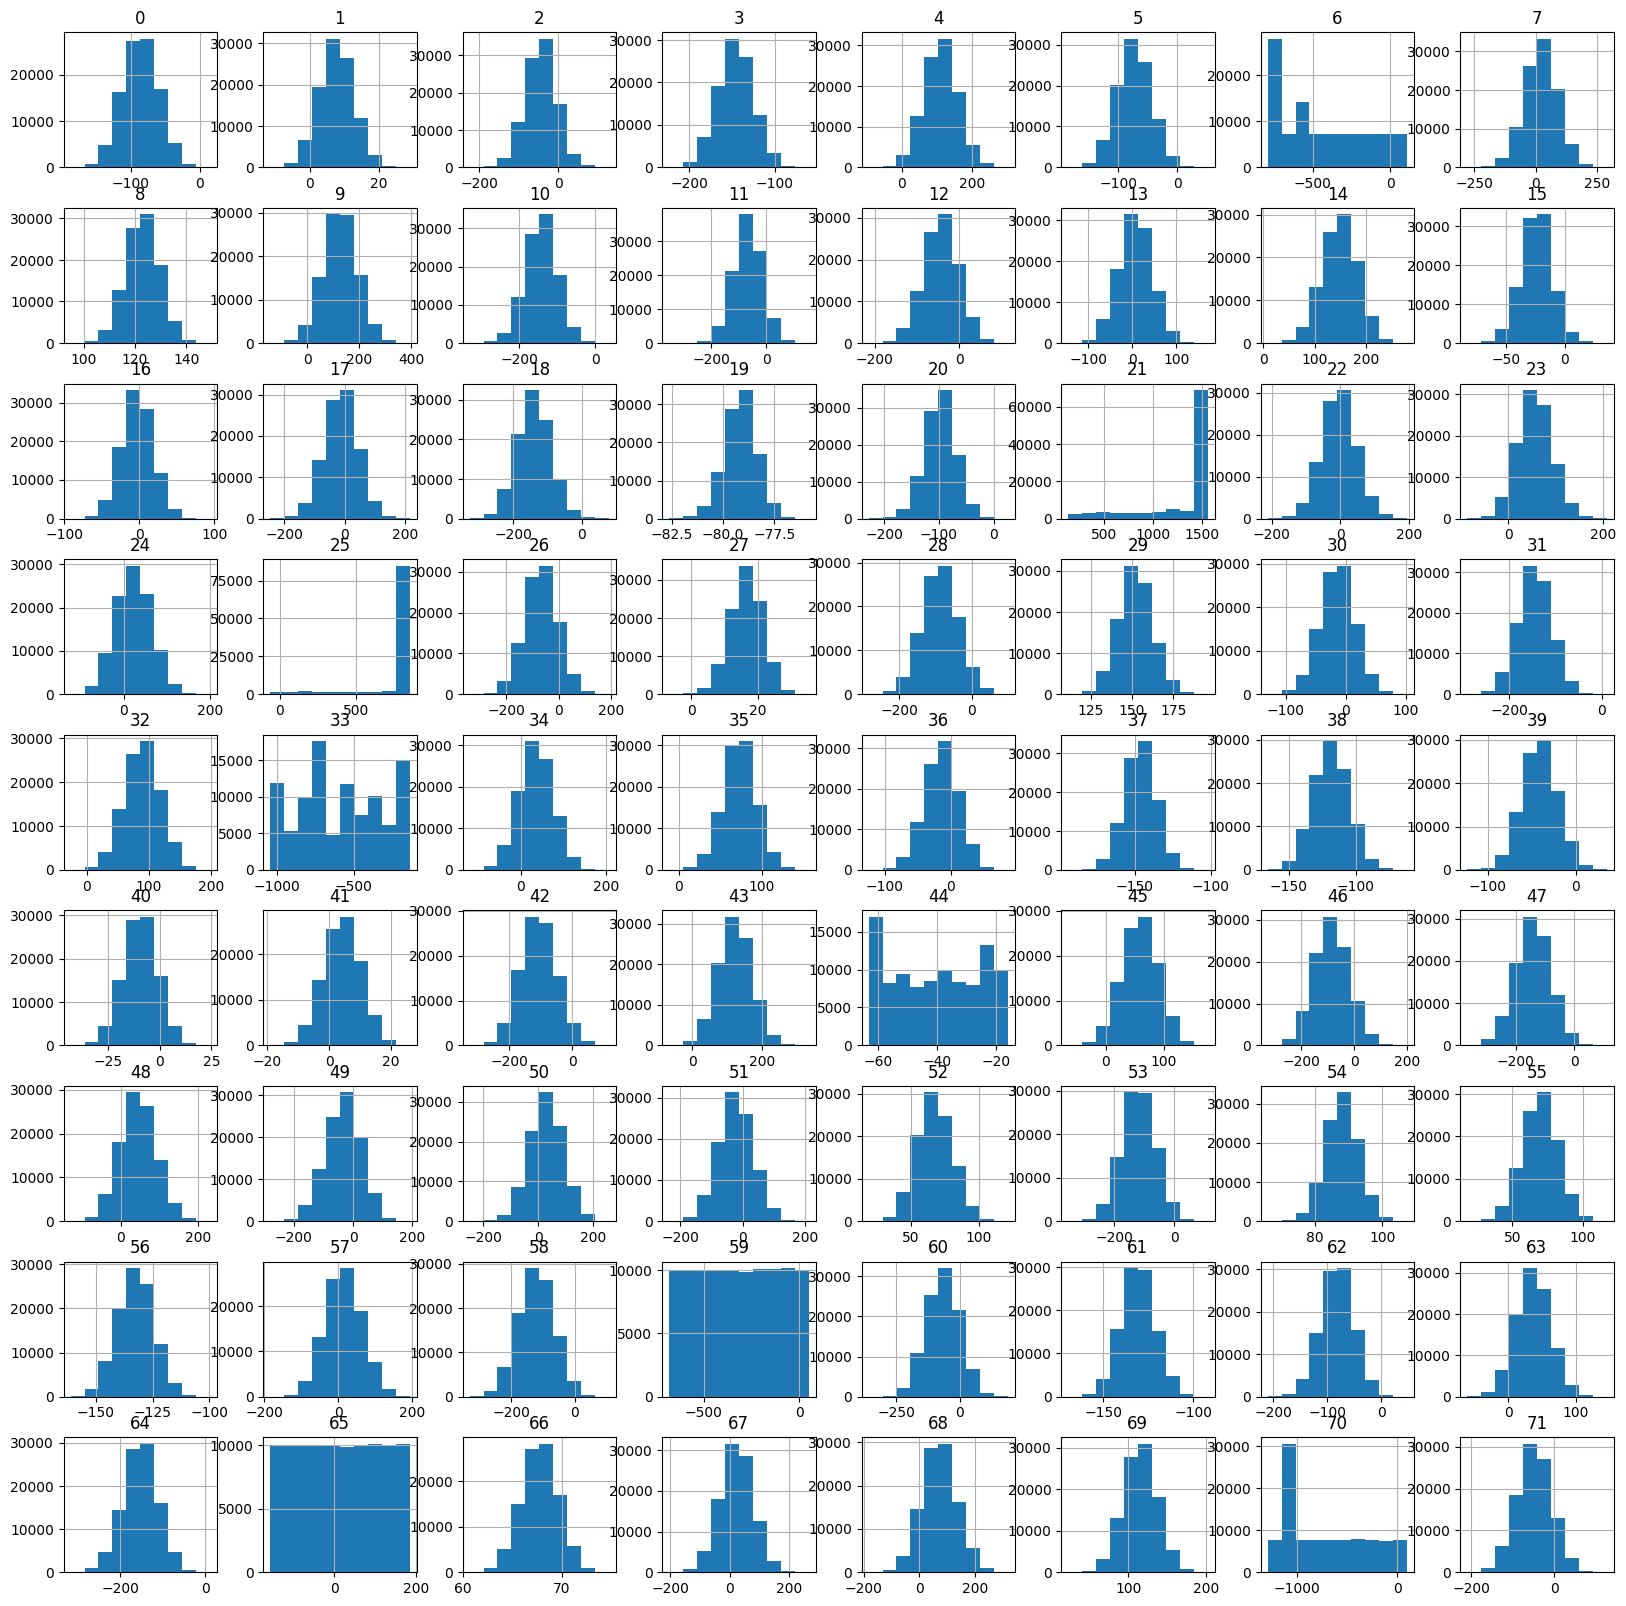

In [11]:
target.hist(figsize = (20,20))

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>],
       [<AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>,
        <AxesSubplot:title={'center':'15'}>],
       [<AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>,
        <AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>,
        <AxesSubpl

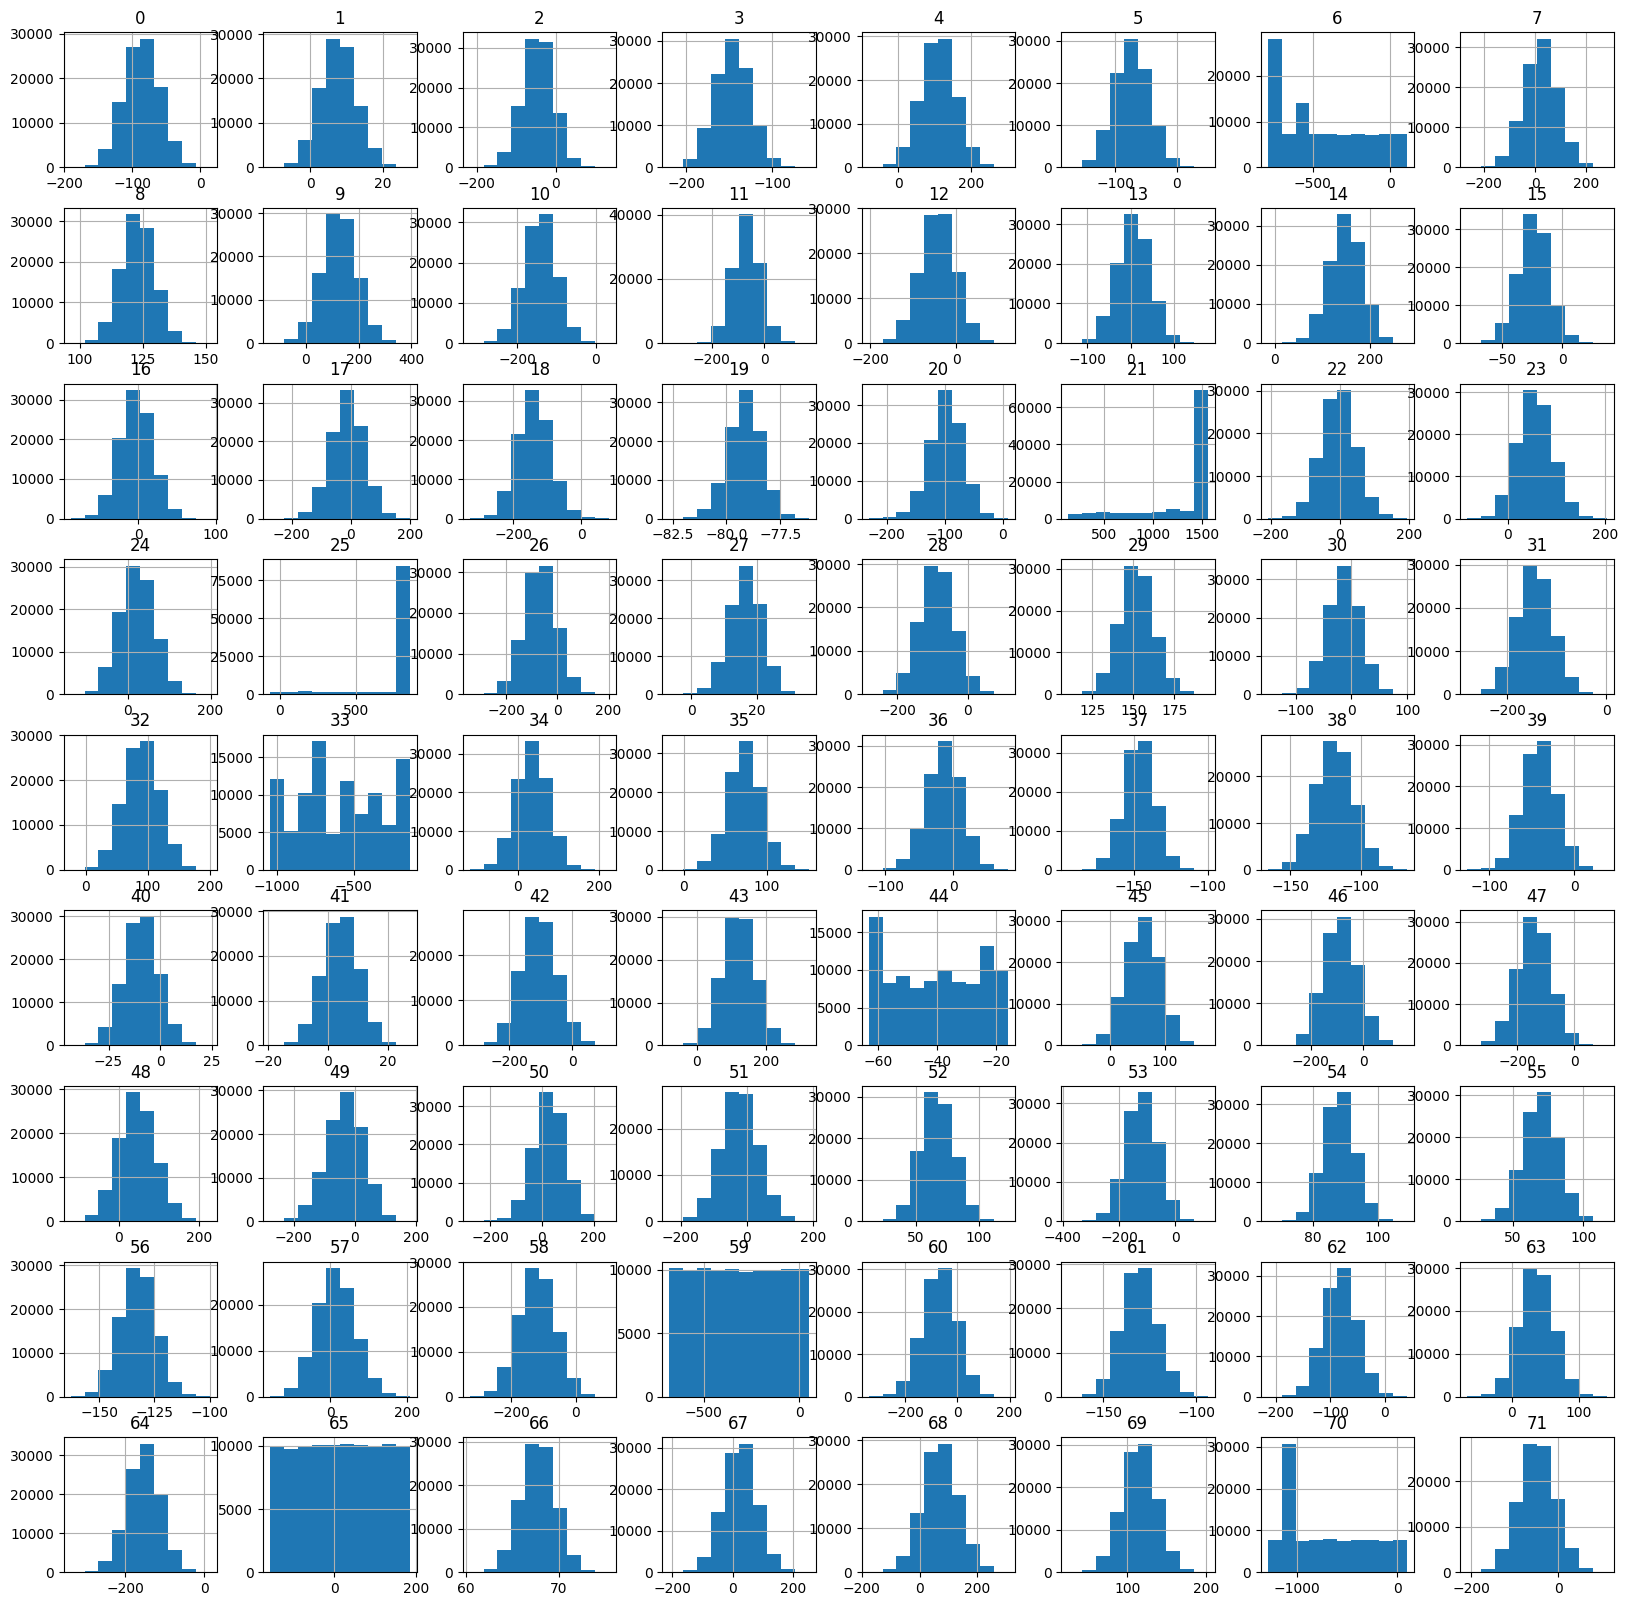

In [12]:
valid.hist(figsize = (20,20))

Удалим колонки, в которых нет нормального распределения и количество значений любой величины - одинаково

In [13]:
target.drop(columns=['59','65', '33'], inplace=True)

Модифицируем колонки, в которых есть одно наиболее частво встречающееся значение, а остальные встречаются с одинаковой, пренебрежительно малой частотой.

In [14]:
target['6'].value_counts().head(20)

-759.626065    20823
-530.124724     6816
 62.154668       119
-463.134239       46
-366.473764       37
-486.775220       19
-694.830421       18
 64.482513        17
-158.973760       16
-648.320310       14
-164.987037       13
-429.396863       13
-312.149404       12
-137.938953       12
-750.151074       11
-292.026552       11
-422.242409       10
 16.791348        10
 31.735356         9
 83.848092         9
Name: 6, dtype: int64

In [15]:
#модификация колонки "6"
target_6minority = target[((target['6'].round())!= -760)&((target['6'].round())!= -530)]
target.loc[((target.loc[:,'6'].round(6))!=-759.626065)&((target.loc[:,'6'].round(6))!=-530.124724),['6']]=target_6minority['6'].median()
target['6'].value_counts()

-340.334051    72361
-759.626065    20823
-530.124724     6816
Name: 6, dtype: int64

In [16]:
target['21'].value_counts().head(5)

1507.231274    64100
1248.126198     1701
1342.641120     1224
1483.714136      769
1054.205600      729
Name: 21, dtype: int64

In [17]:
target_21minority = target[(target['21'].round(6))!= 1507.231274]
target.loc[(target.loc[:,'21'].round(6))!=1507.231274,['21']]=target_21minority['21'].median()
target['21'].value_counts()

1507.231274    64100
981.032320     35900
Name: 21, dtype: int64

In [18]:
target['25'].value_counts().head(5)

813.770071    83337
175.595709      659
701.226241      201
635.156224      103
84.290042        31
Name: 25, dtype: int64

In [19]:
target_25minority = target[(target['25'].round(6))!= 813.770071]
target.loc[(target.loc[:,'25'].round(6))!=813.770071,['25']]=target_25minority['25'].median()
target['25'].value_counts()

813.770071    83337
378.433790    16663
Name: 25, dtype: int64

In [20]:
target['70'].value_counts().head(5)

-1074.464888    22875
-597.491204        47
-1185.335157        7
-314.113558         7
-823.573135         6
Name: 70, dtype: int64

In [21]:
target_70minority = target[(target['70'].round(6))!= -1074.464888]
target.loc[(target.loc[:,'70'].round(6))!=-1074.464888,['70']]=target_70minority['70'].median()
target['70'].value_counts()

-599.449572     77125
-1074.464888    22875
Name: 70, dtype: int64

In [22]:
target['44'].value_counts().head(20)

-61.441417    7308
-16.440254    1828
-21.092403    1696
-24.180965    1015
-39.209783     870
-34.254480     823
-20.873245     705
-46.773374     659
-59.875136     588
-37.903276     576
-59.625520     572
-16.433378     510
-27.627695     508
-55.648453     505
-61.160916     503
-51.801721     434
-37.603198     418
-53.806738     364
-18.661213     364
-57.668621     361
Name: 44, dtype: int64

In [23]:
target_44minority = target[(target['44'].round(6))!= -61.441417]
target.loc[(target.loc[:,'44'].round(6))!=-61.441417,['44']]=target_44minority['44'].median()
target['44'].value_counts()

-38.527648    92692
-61.441417     7308
Name: 44, dtype: int64

Закодируем значения модифицированных колонок, так как, похоже, информация, которую они несут - качественная (категориальная).

In [24]:
encoder = OrdinalEncoder()
columns_to_encode = ['6', '21', '25', '44', '70']
encoder.fit(target[columns_to_encode])
ordinal_columns = pd.DataFrame(encoder.transform(target[columns_to_encode]), columns = columns_to_encode)
ordinal_columns

,6,21,25,44,70
0,2.0,0.0,1.0,1.0,1.0
1,2.0,0.0,1.0,1.0,1.0
2,2.0,1.0,1.0,1.0,0.0
3,2.0,1.0,1.0,1.0,0.0
4,2.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...
99995,2.0,1.0,1.0,1.0,0.0
99996,2.0,1.0,1.0,1.0,1.0
99997,2.0,0.0,1.0,1.0,1.0
99998,2.0,1.0,1.0,1.0,0.0


Остальные признаки масштабируем

In [25]:
columns_to_scale = target.drop(columns_to_encode, axis=1)
scaler=StandardScaler()
scaler.fit(columns_to_scale)
scaled_columns = pd.DataFrame(scaler.transform(columns_to_scale), columns = columns_to_scale.columns)
scaled_columns

,0,1,2,3,4,5,7,8,9,10,...,60,61,62,63,64,66,67,68,69,71
0,1.218659,2.079877,0.039629,-1.850675,1.587961,-0.486308,0.258787,-2.153763,-1.474397,1.275871,...,-0.164080,-0.182183,-0.791579,1.309634,-0.087262,-1.031430,0.206023,-0.173143,0.906949,0.547062
1,-0.094858,-0.173152,0.296912,-1.523962,0.189363,-0.370205,-1.510417,0.284657,0.218924,-0.875735,...,1.353167,-0.716320,1.314829,-1.270984,0.012808,0.202021,0.037262,0.266272,0.713549,-0.067236
2,1.369923,-0.771418,-1.852466,-1.677699,1.642697,0.777931,-0.783196,0.416398,1.316968,1.317597,...,-0.099384,-0.908890,0.949086,1.622456,-0.412557,-0.974613,-0.083446,2.234588,0.312377,0.629833
3,1.453981,0.286998,-1.834136,1.228656,-0.358857,-1.256206,0.878306,0.144055,1.795195,-0.128546,...,-1.341595,-0.055921,0.638241,0.300385,0.165927,-1.995759,1.496880,0.157014,0.143082,0.693994
4,0.220765,1.367848,-0.389568,-0.045702,-1.145549,1.982654,0.375133,0.442602,-0.350126,0.817533,...,-0.945406,2.905010,0.403412,0.320641,-1.069452,-0.475157,0.350220,0.067677,-1.052250,0.663749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.664561,0.805785,-0.498907,-2.085072,0.405497,0.280425,1.132974,-0.663382,-2.029748,0.473495,...,0.244241,-0.990401,0.903762,0.066068,0.466502,-0.719379,-1.066838,-0.188453,-0.377709,0.324578
99996,0.728104,-1.102431,-0.680759,-0.002409,-0.711802,0.893255,-0.703418,1.298809,0.880273,1.596504,...,-1.502411,1.064320,-1.091622,-0.140916,1.015275,-1.078051,-0.960836,0.970566,1.821236,-1.459612
99997,1.216121,-0.592752,0.367880,-0.052078,3.193245,-0.973471,0.709647,-0.767644,1.021824,-1.605813,...,-1.164976,-1.745141,0.205664,-2.013017,-0.790850,-0.245789,1.575754,-0.604900,-0.165554,1.073280
99998,0.310301,0.495604,-0.519753,1.482834,0.595375,-0.754797,1.575477,-0.783391,1.097143,0.113916,...,0.684426,-0.022575,-3.336649,0.822258,-0.838669,-0.877779,-1.133432,-0.265460,-0.207893,-0.751894


In [26]:
target_index = target.index
target= pd.concat([scaled_columns, ordinal_columns], axis=1)
target.set_index(target_index, inplace=True)
target

,0,1,2,3,4,5,7,8,9,10,...,66,67,68,69,71,6,21,25,44,70
Id,,,,,,,,,,,,,,,,,,,,,
0-query,1.218659,2.079877,0.039629,-1.850675,1.587961,-0.486308,0.258787,-2.153763,-1.474397,1.275871,...,-1.031430,0.206023,-0.173143,0.906949,0.547062,2.0,0.0,1.0,1.0,1.0
1-query,-0.094858,-0.173152,0.296912,-1.523962,0.189363,-0.370205,-1.510417,0.284657,0.218924,-0.875735,...,0.202021,0.037262,0.266272,0.713549,-0.067236,2.0,0.0,1.0,1.0,1.0
2-query,1.369923,-0.771418,-1.852466,-1.677699,1.642697,0.777931,-0.783196,0.416398,1.316968,1.317597,...,-0.974613,-0.083446,2.234588,0.312377,0.629833,2.0,1.0,1.0,1.0,0.0
3-query,1.453981,0.286998,-1.834136,1.228656,-0.358857,-1.256206,0.878306,0.144055,1.795195,-0.128546,...,-1.995759,1.496880,0.157014,0.143082,0.693994,2.0,1.0,1.0,1.0,0.0
4-query,0.220765,1.367848,-0.389568,-0.045702,-1.145549,1.982654,0.375133,0.442602,-0.350126,0.817533,...,-0.475157,0.350220,0.067677,-1.052250,0.663749,2.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995-query,0.664561,0.805785,-0.498907,-2.085072,0.405497,0.280425,1.132974,-0.663382,-2.029748,0.473495,...,-0.719379,-1.066838,-0.188453,-0.377709,0.324578,2.0,1.0,1.0,1.0,0.0
99996-query,0.728104,-1.102431,-0.680759,-0.002409,-0.711802,0.893255,-0.703418,1.298809,0.880273,1.596504,...,-1.078051,-0.960836,0.970566,1.821236,-1.459612,2.0,1.0,1.0,1.0,1.0
99997-query,1.216121,-0.592752,0.367880,-0.052078,3.193245,-0.973471,0.709647,-0.767644,1.021824,-1.605813,...,-0.245789,1.575754,-0.604900,-0.165554,1.073280,2.0,0.0,1.0,1.0,1.0


In [27]:
# Попробуем вообще удалить закодированные колонки - может, станет лучше
#target.drop(columns_to_encode, axis=1, inplace=True)

Аналогично модифицируем base

In [28]:
base.drop(columns=['59','65', '33'], inplace=True)

In [29]:
#модификация колонки "6"
base.loc[((base.loc[:,'6'].round(6))!=-759.626065)&((base.loc[:,'6'].round(6))!=-530.124724),['6']]=target_6minority['6'].median()
base['6'].value_counts()

-340.334051    2466234
-759.626065     287090
-530.124724     164815
Name: 6, dtype: int64

In [30]:
base.loc[(base.loc[:,'21'].round(6))!=1507.231274,['21']]=target_21minority['21'].median()
base['21'].value_counts()

1507.231274    1727961
981.032320     1190178
Name: 21, dtype: int64

In [31]:
base.loc[(base.loc[:,'25'].round(6))!=813.770071,['25']]=target_25minority['25'].median()
base['25'].value_counts()

813.770071    2323620
378.433790     594519
Name: 25, dtype: int64

In [32]:
base.loc[(base.loc[:,'70'].round(6))!=-1074.464888,['70']]=target_70minority['70'].median()
base['70'].value_counts()

-599.449572     1694742
-1074.464888    1223397
Name: 70, dtype: int64

In [33]:
base.loc[(base.loc[:,'44'].round(6))!=-61.441417,['44']]=target_44minority['44'].median()
base['44'].value_counts()

-38.527648    2736946
-61.441417     181193
Name: 44, dtype: int64

In [34]:
ordinal_base = pd.DataFrame(encoder.transform(base[columns_to_encode]), columns = columns_to_encode)
ordinal_base

,6,21,25,44,70
0,2.0,1.0,1.0,1.0,1.0
1,2.0,0.0,1.0,1.0,1.0
2,2.0,1.0,1.0,1.0,0.0
3,2.0,0.0,1.0,1.0,0.0
4,2.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
2918134,2.0,1.0,1.0,1.0,1.0
2918135,2.0,1.0,1.0,1.0,0.0
2918136,0.0,0.0,0.0,1.0,0.0
2918137,2.0,1.0,0.0,1.0,0.0


In [35]:
base_to_scale = base.drop(columns_to_encode, axis=1)
scaled_base = pd.DataFrame(scaler.transform(base_to_scale), columns = base_to_scale.columns)
scaled_base

,0,1,2,3,4,5,7,8,9,10,...,60,61,62,63,64,66,67,68,69,71
0,-1.153137,0.703961,-0.530791,1.332914,2.195184,-1.097517,0.350330,-0.331567,0.852371,0.411153,...,0.028649,-0.861544,1.249746,0.075031,0.011236,-2.248757,-0.499962,0.313837,0.003682,-0.299034
1,1.967410,1.143835,-0.667859,-0.999027,-1.133945,-0.449866,-0.861849,-0.515901,1.064727,-0.003263,...,1.198087,-1.902570,-1.193842,0.165701,-0.136673,0.219015,0.023753,1.712557,0.076187,-0.267352
2,1.205056,-0.259296,0.369639,0.621726,0.820223,-0.914266,0.623629,0.906272,0.589429,0.008319,...,-0.542305,-0.423684,0.154772,0.359402,-1.338889,-1.215113,0.780530,0.123168,0.065074,0.387687
3,-0.084928,-0.731787,-1.128484,-1.906019,-0.742149,0.494229,-0.831142,-0.159577,0.155800,0.785870,...,-0.357556,-1.982823,0.342212,-1.705888,0.122429,-0.868699,-0.785935,1.025594,0.105846,-0.592256
4,0.487714,-0.230505,2.233096,0.269668,-2.221152,-1.354354,0.362976,-0.138741,-0.215693,0.740878,...,-0.526656,0.569178,0.780632,0.778631,-0.173787,-0.562154,-0.460336,-0.130168,0.920293,1.184646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918134,-1.540771,-0.591025,2.095376,1.019926,2.054849,0.881265,-1.398941,0.379921,-1.490906,1.012826,...,0.063224,-0.559080,0.351456,0.730750,-0.958407,-1.242817,1.549192,-2.028967,0.095671,-0.710006
2918135,-0.901797,-0.445993,0.549082,-0.616501,0.038480,-0.545451,1.759283,0.922482,0.595172,-0.296337,...,-0.363927,0.734597,0.351593,-0.727958,1.501012,0.485367,-0.385661,-1.572282,-1.003570,-1.026199
2918136,-0.453348,-1.979211,-0.705866,0.070369,0.790223,1.796967,-1.960806,0.268366,-0.113376,0.747501,...,-1.253138,1.242402,0.820963,1.026331,-0.411877,0.431669,0.363728,-0.070451,0.664760,1.291377
2918137,-0.058509,0.251754,0.225751,1.940615,-1.457714,-0.801409,-0.172561,0.457432,-1.030575,-0.327702,...,0.239941,-0.499810,-0.186515,-1.729555,-0.532735,0.447598,-0.402401,0.338245,0.447281,-0.176723


In [36]:
base_index = base.index
base = pd.concat([scaled_base, ordinal_base], axis=1)
base.set_index(base_index, inplace=True)
base

,0,1,2,3,4,5,7,8,9,10,...,66,67,68,69,71,6,21,25,44,70
Id,,,,,,,,,,,,,,,,,,,,,
0-base,-1.153137,0.703961,-0.530791,1.332914,2.195184,-1.097517,0.350330,-0.331567,0.852371,0.411153,...,-2.248757,-0.499962,0.313837,0.003682,-0.299034,2.0,1.0,1.0,1.0,1.0
1-base,1.967410,1.143835,-0.667859,-0.999027,-1.133945,-0.449866,-0.861849,-0.515901,1.064727,-0.003263,...,0.219015,0.023753,1.712557,0.076187,-0.267352,2.0,0.0,1.0,1.0,1.0
2-base,1.205056,-0.259296,0.369639,0.621726,0.820223,-0.914266,0.623629,0.906272,0.589429,0.008319,...,-1.215113,0.780530,0.123168,0.065074,0.387687,2.0,1.0,1.0,1.0,0.0
3-base,-0.084928,-0.731787,-1.128484,-1.906019,-0.742149,0.494229,-0.831142,-0.159577,0.155800,0.785870,...,-0.868699,-0.785935,1.025594,0.105846,-0.592256,2.0,0.0,1.0,1.0,0.0
4-base,0.487714,-0.230505,2.233096,0.269668,-2.221152,-1.354354,0.362976,-0.138741,-0.215693,0.740878,...,-0.562154,-0.460336,-0.130168,0.920293,1.184646,2.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4744755-base,-1.540771,-0.591025,2.095376,1.019926,2.054849,0.881265,-1.398941,0.379921,-1.490906,1.012826,...,-1.242817,1.549192,-2.028967,0.095671,-0.710006,2.0,1.0,1.0,1.0,1.0
4744759-base,-0.901797,-0.445993,0.549082,-0.616501,0.038480,-0.545451,1.759283,0.922482,0.595172,-0.296337,...,0.485367,-0.385661,-1.572282,-1.003570,-1.026199,2.0,1.0,1.0,1.0,0.0
4744762-base,-0.453348,-1.979211,-0.705866,0.070369,0.790223,1.796967,-1.960806,0.268366,-0.113376,0.747501,...,0.431669,0.363728,-0.070451,0.664760,1.291377,0.0,0.0,0.0,1.0,0.0


In [37]:
# Попробуем вообще удалить закодированные колонки - может, станет лучше
#base.drop(columns_to_encode, axis=1, inplace=True)
#base.head(2)

## Create index

In [38]:
dims = base.shape[1]
n_cells = 100
# how many cells
quantizer = faiss.IndexFlatL2(dims)
idx_l2 = faiss.IndexIVFFlat(quantizer, dims, n_cells)

In [39]:
idx_l2.train(np.ascontiguousarray(base.values[:50000, :]).astype('float32'))

idx_l2.add(np.ascontiguousarray(base.values).astype('float32'))

In [40]:
# Сколько векторов в индексе?
idx_l2.ntotal

2918139

Столько же, сколько строчек в base

In [41]:
base_index = {k: v for k, v in enumerate(base.index.to_list())}
base_index[5]

'5-base'

In [42]:
#Удаляем ненужную переменную 
del base

In [43]:
# Добавляем nprobe
idx_l2.nprobe = 10

In [45]:
# Тут происходит поиск похожих векторов
vecs, idx = idx_l2.search(np.ascontiguousarray(target.values).astype('float32'), 5)

In [46]:
# Матрица евклидовых расстояний расстояний в квадрате до анализируемых векторов (из target)
vecs

array([[1.2533328e+01, 1.2745121e+01, 1.2858729e+01, 1.3178261e+01,
        1.3240189e+01],
       [1.1974838e+01, 1.5299837e+01, 1.7335463e+01, 2.2245216e+01,
        2.3245216e+01],
       [1.4945358e+01, 1.5582835e+01, 1.7202114e+01, 1.7666098e+01,
        1.8313828e+01],
       ...,
       [4.9814427e-01, 1.5222800e+00, 2.3959956e+00, 2.4359977e+00,
        2.7759504e+00],
       [2.5624564e+00, 2.5624564e+00, 2.5632339e+00, 2.5632339e+00,
        2.5632339e+00],
       [5.4530153e-07, 3.5467186e+01, 3.5658432e+01, 3.8428757e+01,
        3.8818619e+01]], dtype=float32)

In [47]:
#Номера векторов из base
idx

array([[1113711,  232405, 1818641,  755584, 2360257],
       [  15185,  519311,  737853, 2524968,  223456],
       [ 173120, 1162532, 1784963,  137853, 2863071],
       ...,
       [1733416, 2703195,  827343,  541710, 2865455],
       [ 950418, 2797773, 1148688, 1643907, 1765932],
       [1958647,  673739, 1138466, 1394495,  181331]])

In [48]:
#Считаем accuracy
acc = 0
for i, el in zip(targets.values.tolist(), idx.tolist()):
    #добавляет 0 или 1 - есть правильный ответ в 5-ке выбранных или нет
    acc += int(i in [base_index[r] for r in el])

print(100 * acc / len(idx))

69.868


**Вывод**
<br>
Значение accuracy@5 с изначальным кодом (количество ячеек n_cells=1) было равно 13.8. С увеличением cells до 10 метрика упала до 12, но и код стал выполняться быстрее. С увеличением cells до 100 метрика ещё упала - 7.7, а код стал выполняется пару минут. Добавили nprobes = 10 - и метрика увеличилась до 13.65 - почти как в начале, однако, код выполняется намного быстрее (в самом начале было минут 40, а теперь 5 минут). Когда вместо 5-ти ближайших соседей ищем 50 - acuuracy увеличивается до 16.544, а на 100 - до 17.426, среди 200 соседей - 18.41.
Далее смотрела accuracy@5 как целевую метрику, а также accuracy@200 (200 наиболее похожих позиций) - чтобы оценить, можно ли брать результат для дальнейшей оптимизации каким-либо методом ML, так как, чтобы перейти к дальнейшему отбору, нужно, чтобы правильный ответ был во всех списках, полученных на этапе faiss.
<br>
<br>
После введения предобработки данных (удаление или модификация данных в двух столбцах без нормального распределения) accuracy@5 стала равна 20.295. После кодирования столбцов Ordinal encoder-ом accuracy@5 стала 26.26. После масштабирования accuracy@5 67.598, при этом accuracy@200 становится 79.881. Попробовала удалить вообще все ненормально распределённые столбцы - получила accuracy@5 70.478, то етсь выше, чем раньше. Accuracy@200 80.682. 
<br>
Если из столбцов, где нет нормального распределения, удалить те, в которых невозможно увидеть закономерность распределения значений (33, 59, 65), а у остальных (6, 21, 25, 44, 70) данные сгруппировать и закодировать Ordinal ENcoder-ом - получаем accuracy@5 69.868, accuracy@200 80.72. Эти значения не сильно отличаются от ситуации, когда мы всё просто удаляли.